# Capstone Project Part 2 - Problem Statement and EDA

Note: As of the submission of this notebook, I have not yet finished collecting all of the data for the project. I was able to get the statistics for all of the college players, but I still need to scrape the information for all of the NBA players. The scraping, cleaning, and EDA in this notebook is for the college player data.

## Problem Statement / Goal

For this project I want to predict how well this year's (2017) NBA draft class from US colleges would perform in their professional careers. I plan to do this using some sort of regression model. I have yet to decide which specific model to use yet, but I may try a number of different ones and compare their results. The plan for me right now is to collect the college stats for all NBA players in the 3 point era who went to college as well as their evalutaion metric for their NBA career. I have not decided yet, but it will either be the player's win shares or their player efficiency rating. Also, I orginally wanted to take that metric measurement for the player's 5th year, but I may just take their measurement over their whole career. I'm going to use the NBA player data as the set to train my model on, using the evaluation metric as the target variable. Then I plan to use the trained model on the data for the college players in order to predict their NBA performance.

The list of players comes from draft express top 100 hundred prospect rankings as of 22 Mar 2017

## Risks / Assumptions

In researching the data that I needed for this project, I found that my training set is not that large, there are only a little bit over 1000 players that I can train my data. In order to build a better model, I ideally would need more data. But in this situation, there is no more data that I can possibly get. Because of that, my model may not ending up performing as well as I would like since, there are only a limited number of players whose stats I can use.

In [126]:
import pandas as pd
import requests
import bs4
from bs4 import BeautifulSoup
import re
import time
from random import randint
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

# Collecting Data

I used webscraping to obtain a list of the top 100 prospects for this year's draft from DraftExpress.com. I then filtered out the players that didn't go to a US college and the scraped their statistics from Basketball Reference

In [2]:
# scraping draft express for the list of players
url="http://www.draftexpress.com/rankings/Top-100-Prospects/#list"
response = requests.get(url)
page=response.content
soup = BeautifulSoup(page, "lxml")

In [3]:
x=soup.findAll('tr')

In [4]:
# checking how the results look
x[2].findChildren()

[<td>1</td>,
 <td class="text">\n<a href="/profile/Markelle-Fultz-90302/" title="Markelle Fultz draftexpress profile">\t\t\t\tMarkelle Fultz\n\t\t\t\t</a> </td>,
 <a href="/profile/Markelle-Fultz-90302/" title="Markelle Fultz draftexpress profile">\t\t\t\tMarkelle Fultz\n\t\t\t\t</a>,
 <td data-order="USA" data-search="USA">\n<div class="flag-icon flag-icon-us" title="USA"></div>\n</td>,
 <div class="flag-icon flag-icon-us" title="USA"></div>,
 <td>PG</td>,
 <td>18.8</td>,
 <td data-order="76">6'4.0"</td>,
 <td>195</td>,
 <td data-order="81.75">6'9.8"</td>,
 <td>23.3</td>,
 <td>5.9</td>,
 <td>6.0</td>,
 <td>28.6</td>,
 <td data-order="Washington USA">\n<a href="/clubhouse/Washington-337/" title="Washington draft history">\n<img alt="Washington, USA" src="http://www.draftexpress.com/upload/team/logo/337.png" title="Washington, USA"/>\n</a>\n</td>,
 <a href="/clubhouse/Washington-337/" title="Washington draft history">\n<img alt="Washington, USA" src="http://www.draftexpress.com/upload/t

In [5]:
# finding where to scrape the names from
x[2].findChildren()[2].text

u'\t\t\t\tMarkelle Fultz\n\t\t\t\t'

In [6]:
# finding where to scrape the positions froms
x[2].findChildren()[5].text

u'PG'

In [7]:
# finding height
x[2].findChildren()[7].text

u'6\'4.0"'

In [8]:
# finding weight
x[2].findChildren()[8].text

u'195'

In [9]:
# finding wingspan
x[2].findChildren()[9].text

u'6\'9.8"'

In [10]:
# finding school
x[2].findChildren()[14]

<td data-order="Washington USA">\n<a href="/clubhouse/Washington-337/" title="Washington draft history">\n<img alt="Washington, USA" src="http://www.draftexpress.com/upload/team/logo/337.png" title="Washington, USA"/>\n</a>\n</td>

In [11]:
x[2].findChildren()[16]['alt']

'Washington, USA'

In [12]:
# Finding league. using this value to filter out non-NCAA players
x[2].findChildren()[17].text

u'\n\n\t\t\t\t\tNCAA\n\t\t\t\t\n'

In [13]:
# creating lists here and in below cells for different variables
names=[]
for i in x[2:102]:
    names.append(i.findChildren()[2].text)

In [14]:
positions=[]
for i in x[2:102]:
    positions.append(i.findChildren()[5].text)

In [15]:
heights=[]
for i in x[2:102]:
    heights.append(i.findChildren()[7].text)

In [16]:
weights=[]
for i in x[2:102]:
    weights.append(i.findChildren()[8].text)

In [17]:
wingspans=[]
for i in x[2:102]:
    wingspans.append(i.findChildren()[9].text)

In [18]:
schools=[]
for i in x[2:102]:
    schools.append(i.findChildren()[16]['alt'])

In [19]:
leagues=[]
for i in x[2:102]:
    leagues.append(i.findChildren()[17].text)

In [20]:
# creating df of scraped info
playerlist=pd.DataFrame({'name': names,'position': positions,'height': heights,'weight': weights,
                         'wingspan': wingspans,'school': schools,'league': leagues})

In [21]:
playerlist.head()

,height,league,name,position,school,weight,wingspan
0,"6'4.0""",\n\n\t\t\t\t\tNCAA\n\t\t\t\t\n,\t\t\t\tMarkelle Fultz\n\t\t\t\t,PG,"Washington, USA",195,"6'9.8"""
1,"6'6.0""",\n\n\t\t\t\t\tNCAA\n\t\t\t\t\n,\t\t\t\tLonzo Ball\n\t\t\t\t,PG,"UCLA, USA",190,"6'7.0"""
2,"6'8.0""",\n\n\t\t\t\t\tNCAA\n\t\t\t\t\n,\t\t\t\tJosh Jackson\n\t\t\t\t,SF,"Kansas, USA",203,"6'9.8"""
3,"6'8.0""",\n\n\t\t\t\t\tNCAA\n\t\t\t\t\n,\t\t\t\tJayson Tatum\n\t\t\t\t,SF,"Duke, USA",204,"6'11.0"""
4,"6'4.0""",\n\n\t\t\t\t\tNCAA\n\t\t\t\t\n,\t\t\t\tDe'Aaron Fox\n\t\t\t\t,PG,"Kentucky, USA",171,"6'4.5"""


In [22]:
playerlist=playerlist.reindex(columns=['name','position','school','height','weight','wingspan','league']) 

In [23]:
playerlist.head()

,name,position,school,height,weight,wingspan,league
0,\t\t\t\tMarkelle Fultz\n\t\t\t\t,PG,"Washington, USA","6'4.0""",195,"6'9.8""",\n\n\t\t\t\t\tNCAA\n\t\t\t\t\n
1,\t\t\t\tLonzo Ball\n\t\t\t\t,PG,"UCLA, USA","6'6.0""",190,"6'7.0""",\n\n\t\t\t\t\tNCAA\n\t\t\t\t\n
2,\t\t\t\tJosh Jackson\n\t\t\t\t,SF,"Kansas, USA","6'8.0""",203,"6'9.8""",\n\n\t\t\t\t\tNCAA\n\t\t\t\t\n
3,\t\t\t\tJayson Tatum\n\t\t\t\t,SF,"Duke, USA","6'8.0""",204,"6'11.0""",\n\n\t\t\t\t\tNCAA\n\t\t\t\t\n
4,\t\t\t\tDe'Aaron Fox\n\t\t\t\t,PG,"Kentucky, USA","6'4.0""",171,"6'4.5""",\n\n\t\t\t\t\tNCAA\n\t\t\t\t\n


In [24]:
# cleaning the name and league columns here and in the next few cells
playerlist['name']=playerlist['name'].str.replace('\t', '')

In [25]:
playerlist['name']=playerlist['name'].str.replace('\n', '')

In [26]:
playerlist['league']=playerlist['league'].str.replace('\n', '')
playerlist['league']=playerlist['league'].str.replace('\t', '')

In [27]:
playerlist.head()

,name,position,school,height,weight,wingspan,league
0,Markelle Fultz,PG,"Washington, USA","6'4.0""",195,"6'9.8""",NCAA
1,Lonzo Ball,PG,"UCLA, USA","6'6.0""",190,"6'7.0""",NCAA
2,Josh Jackson,SF,"Kansas, USA","6'8.0""",203,"6'9.8""",NCAA
3,Jayson Tatum,SF,"Duke, USA","6'8.0""",204,"6'11.0""",NCAA
4,De'Aaron Fox,PG,"Kentucky, USA","6'4.0""",171,"6'4.5""",NCAA


In [28]:
#creating a df that contains only the college players
collegeplayers=playerlist[playerlist['league'].str.contains("NCAA")]

In [29]:
collegeplayers=collegeplayers.reset_index(drop=True)

In [31]:
# this player's name was listed wrong so I had to correct it
collegeplayers.set_value(25,'name','Edrice Adebayo')

,name,position,school,height,weight,wingspan,league
0,Markelle Fultz,PG,"Washington, USA","6'4.0""",195,"6'9.8""",NCAA
1,Lonzo Ball,PG,"UCLA, USA","6'6.0""",190,"6'7.0""",NCAA
2,Josh Jackson,SF,"Kansas, USA","6'8.0""",203,"6'9.8""",NCAA
3,Jayson Tatum,SF,"Duke, USA","6'8.0""",204,"6'11.0""",NCAA
4,De'Aaron Fox,PG,"Kentucky, USA","6'4.0""",171,"6'4.5""",NCAA
5,Dennis Smith,PG,"N.C. State, USA","6'3.0""",195,"6'3.0""",NCAA
6,Lauri Markkanen,PF,"Arizona, USA","7'0.0""",225,-,NCAA
7,Malik Monk,PG/SG,"Kentucky, USA","6'4.0""",197,"6'3.5""",NCAA
8,Jonathan Isaac,SF,"Florida St, USA","6'11.0""",205,"7'1.3""",NCAA
9,Miles Bridges,SF/PF,"Michigan St, USA","6'6.0""",226,"6'8.8""",NCAA


In [32]:
# this playe's name was listed wrong as well
collegeplayers.set_value(51,'name','Malik Milton')

,name,position,school,height,weight,wingspan,league
0,Markelle Fultz,PG,"Washington, USA","6'4.0""",195,"6'9.8""",NCAA
1,Lonzo Ball,PG,"UCLA, USA","6'6.0""",190,"6'7.0""",NCAA
2,Josh Jackson,SF,"Kansas, USA","6'8.0""",203,"6'9.8""",NCAA
3,Jayson Tatum,SF,"Duke, USA","6'8.0""",204,"6'11.0""",NCAA
4,De'Aaron Fox,PG,"Kentucky, USA","6'4.0""",171,"6'4.5""",NCAA
5,Dennis Smith,PG,"N.C. State, USA","6'3.0""",195,"6'3.0""",NCAA
6,Lauri Markkanen,PF,"Arizona, USA","7'0.0""",225,-,NCAA
7,Malik Monk,PG/SG,"Kentucky, USA","6'4.0""",197,"6'3.5""",NCAA
8,Jonathan Isaac,SF,"Florida St, USA","6'11.0""",205,"7'1.3""",NCAA
9,Miles Bridges,SF/PF,"Michigan St, USA","6'6.0""",226,"6'8.8""",NCAA


In [33]:
len(collegeplayers)

78

In [34]:
collegeplayers.head()

,name,position,school,height,weight,wingspan,league
0,Markelle Fultz,PG,"Washington, USA","6'4.0""",195,"6'9.8""",NCAA
1,Lonzo Ball,PG,"UCLA, USA","6'6.0""",190,"6'7.0""",NCAA
2,Josh Jackson,SF,"Kansas, USA","6'8.0""",203,"6'9.8""",NCAA
3,Jayson Tatum,SF,"Duke, USA","6'8.0""",204,"6'11.0""",NCAA
4,De'Aaron Fox,PG,"Kentucky, USA","6'4.0""",171,"6'4.5""",NCAA


In [35]:
collegeplayers.shape

(78, 7)

In [36]:
# creating an new column for names here and in the next few cells
collegeplayers['name2'] = collegeplayers['name'].str.replace("'", '')

In [37]:
collegeplayers.head()

,name,position,school,height,weight,wingspan,league,name2
0,Markelle Fultz,PG,"Washington, USA","6'4.0""",195,"6'9.8""",NCAA,Markelle Fultz
1,Lonzo Ball,PG,"UCLA, USA","6'6.0""",190,"6'7.0""",NCAA,Lonzo Ball
2,Josh Jackson,SF,"Kansas, USA","6'8.0""",203,"6'9.8""",NCAA,Josh Jackson
3,Jayson Tatum,SF,"Duke, USA","6'8.0""",204,"6'11.0""",NCAA,Jayson Tatum
4,De'Aaron Fox,PG,"Kentucky, USA","6'4.0""",171,"6'4.5""",NCAA,DeAaron Fox


In [38]:
collegeplayers['name2'] = collegeplayers['name2'].str.lower()

In [39]:
collegeplayers.head()

,name,position,school,height,weight,wingspan,league,name2
0,Markelle Fultz,PG,"Washington, USA","6'4.0""",195,"6'9.8""",NCAA,markelle fultz
1,Lonzo Ball,PG,"UCLA, USA","6'6.0""",190,"6'7.0""",NCAA,lonzo ball
2,Josh Jackson,SF,"Kansas, USA","6'8.0""",203,"6'9.8""",NCAA,josh jackson
3,Jayson Tatum,SF,"Duke, USA","6'8.0""",204,"6'11.0""",NCAA,jayson tatum
4,De'Aaron Fox,PG,"Kentucky, USA","6'4.0""",171,"6'4.5""",NCAA,deaaron fox


In [40]:
collegeplayers['name2'] = collegeplayers['name2'].str.replace(".", '')

In [41]:
collegeplayers['name2'] = collegeplayers['name2'].str.replace(' ', '-')

In [42]:
collegeplayers.head()

,name,position,school,height,weight,wingspan,league,name2
0,Markelle Fultz,PG,"Washington, USA","6'4.0""",195,"6'9.8""",NCAA,markelle-fultz
1,Lonzo Ball,PG,"UCLA, USA","6'6.0""",190,"6'7.0""",NCAA,lonzo-ball
2,Josh Jackson,SF,"Kansas, USA","6'8.0""",203,"6'9.8""",NCAA,josh-jackson
3,Jayson Tatum,SF,"Duke, USA","6'8.0""",204,"6'11.0""",NCAA,jayson-tatum
4,De'Aaron Fox,PG,"Kentucky, USA","6'4.0""",171,"6'4.5""",NCAA,deaaron-fox


In [43]:
# testing a scrape
url='http://www.sports-reference.com/cbb/players/lonzo-ball-1.html'
response = requests.get(url)
page=response.content
soup = BeautifulSoup(page, "lxml")

In [44]:
x=soup.findAll('tr', class_='thead')

In [45]:
x[0].findAll('td')

[<td class="left " data-stat="school_name">UCLA</td>,
 <td class="left " data-stat="conf_abbr"></td>,
 <td class="right " data-stat="g">36</td>,
 <td class="right " data-stat="mp_per_g">35.1</td>,
 <td class="right " data-stat="fg_per_g">5.3</td>,
 <td class="right " data-stat="fga_per_g">9.5</td>,
 <td class="right " data-stat="fg_pct">.551</td>,
 <td class="right " data-stat="fg2_per_g">3.0</td>,
 <td class="right " data-stat="fg2a_per_g">4.1</td>,
 <td class="right " data-stat="fg2_pct">.732</td>,
 <td class="right " data-stat="fg3_per_g">2.2</td>,
 <td class="right " data-stat="fg3a_per_g">5.4</td>,
 <td class="right " data-stat="fg3_pct">.412</td>,
 <td class="right " data-stat="ft_per_g">1.8</td>,
 <td class="right " data-stat="fta_per_g">2.7</td>,
 <td class="right " data-stat="ft_pct">.673</td>,
 <td class="right " data-stat="trb_per_g">6.0</td>,
 <td class="right " data-stat="ast_per_g">7.6</td>,
 <td class="right " data-stat="stl_per_g">1.8</td>,
 <td class="right " data-stat

In [46]:
x[0].findAll('td')[2].text

u'36'

In [47]:
x2=soup.findAll('div', class_='p2')

In [48]:
#EFG
x2[0].findAll('p')[-1].text

u'66.8'

In [49]:
x3=soup.findAll('div', class_='p3')

In [50]:
x3

[<div class="p3">\n<div>\n<h4 class="poptip" data-tip="Player Efficiency Rating">PER</h4><p>24.7</p>\n<p>24.7</p></div>\n<div>\n<h4 class="poptip" data-tip="Win Shares; an estimate of the number of wins contributed by a player due to his offense and defense.">WS</h4><p>6.8</p>\n<p>6.8</p></div>\n</div>]

In [51]:
#PER
x3[0].findAll('div')[0].findAll('p')[-1]

<p>24.7</p>

In [52]:
#WS
x3[0].findAll('div')[1].findAll('p')[-1]

<p>6.8</p>

In [53]:
# creating lists for variables
g=[]
mp_per_g=[]
fg_per_g=[]
fga_per_g=[]
fg_pct=[]
fg2_per_g=[]
fg2a_per_g=[]
fg2_pct=[]
fg3_per_g=[]
fg3a_per_g=[]
fg3_pct=[]
ft_per_g=[]
fta_per_g=[]
ft_pct=[]
trb_per_g=[]
ast_per_g=[]
stl_per_g=[]
blk_per_g=[]
tov_per_g=[]
pf_per_g=[]
pts_per_g=[]
efg=[]
per=[]
ws=[]
year=[]

In [56]:
collegeplayers.shape

(78, 8)

In [57]:
collegeplayers.head()

,name,position,school,height,weight,wingspan,league,name2
0,Markelle Fultz,PG,"Washington, USA","6'4.0""",195,"6'9.8""",NCAA,markelle-fultz
1,Lonzo Ball,PG,"UCLA, USA","6'6.0""",190,"6'7.0""",NCAA,lonzo-ball
2,Josh Jackson,SF,"Kansas, USA","6'8.0""",203,"6'9.8""",NCAA,josh-jackson
3,Jayson Tatum,SF,"Duke, USA","6'8.0""",204,"6'11.0""",NCAA,jayson-tatum
4,De'Aaron Fox,PG,"Kentucky, USA","6'4.0""",171,"6'4.5""",NCAA,deaaron-fox


In [58]:
# this player's page url was unique so I had to adjust name2 to reflect this
collegeplayers.set_value(65,'name2','andrew-whiteiii')

,name,position,school,height,weight,wingspan,league,name2
0,Markelle Fultz,PG,"Washington, USA","6'4.0""",195,"6'9.8""",NCAA,markelle-fultz
1,Lonzo Ball,PG,"UCLA, USA","6'6.0""",190,"6'7.0""",NCAA,lonzo-ball
2,Josh Jackson,SF,"Kansas, USA","6'8.0""",203,"6'9.8""",NCAA,josh-jackson
3,Jayson Tatum,SF,"Duke, USA","6'8.0""",204,"6'11.0""",NCAA,jayson-tatum
4,De'Aaron Fox,PG,"Kentucky, USA","6'4.0""",171,"6'4.5""",NCAA,deaaron-fox
5,Dennis Smith,PG,"N.C. State, USA","6'3.0""",195,"6'3.0""",NCAA,dennis-smith
6,Lauri Markkanen,PF,"Arizona, USA","7'0.0""",225,-,NCAA,lauri-markkanen
7,Malik Monk,PG/SG,"Kentucky, USA","6'4.0""",197,"6'3.5""",NCAA,malik-monk
8,Jonathan Isaac,SF,"Florida St, USA","6'11.0""",205,"7'1.3""",NCAA,jonathan-isaac
9,Miles Bridges,SF/PF,"Michigan St, USA","6'6.0""",226,"6'8.8""",NCAA,miles-bridges


In [59]:
#Looping through name2, using their values in the URL for the requests in my webscraping

for i in collegeplayers['name2']:
    url='http://www.sports-reference.com/cbb/players/'+i+'-1.html'
    response = requests.get(url)
    page=response.content
    soup = BeautifulSoup(page, "lxml")
    
    x=soup.findAll('tr', class_='thead')
    g.append(x[0].findAll('td')[2].text)
    mp_per_g.append(x[0].findAll('td')[3].text)
    fg_per_g.append(x[0].findAll('td')[4].text)
    fga_per_g.append(x[0].findAll('td')[5].text)
    fg_pct.append(x[0].findAll('td')[6].text)
    fg2_per_g.append(x[0].findAll('td')[7].text)
    fg2a_per_g.append(x[0].findAll('td')[8].text)
    fg2_pct.append(x[0].findAll('td')[9].text)
    fg3_per_g.append(x[0].findAll('td')[10].text)
    fg3a_per_g.append(x[0].findAll('td')[11].text)
    fg3_pct.append(x[0].findAll('td')[12].text)
    ft_per_g.append(x[0].findAll('td')[13].text)
    fta_per_g.append(x[0].findAll('td')[14].text)
    ft_pct.append(x[0].findAll('td')[15].text)
    trb_per_g.append(x[0].findAll('td')[16].text)
    ast_per_g.append(x[0].findAll('td')[17].text)
    stl_per_g.append(x[0].findAll('td')[18].text)
    blk_per_g.append(x[0].findAll('td')[19].text)
    tov_per_g.append(x[0].findAll('td')[20].text)
    pf_per_g.append(x[0].findAll('td')[21].text)
    pts_per_g.append(x[0].findAll('td')[22].text)
    
    x2=soup.findAll('div', class_='p2')
    efg.append(x2[0].findAll('p')[-1].text)
    
    x3=soup.findAll('div', class_='p3')
    per.append(x3[0].findAll('div')[0].findAll('p')[-1].text)
    ws.append(x3[0].findAll('div')[1].findAll('p')[-1].text)
    
    x4=soup.findAll('th',class_="left")
    year.append(x4[-2].text)
    x4[0].text
    
    time.sleep(randint(20,30))
    

In [60]:
#checking that I got all 78
len(g)

78

In [62]:
# creating the columns for all the variables in the dataframe
collegeplayers['g']=g
collegeplayers['mp_per_g']=mp_per_g
collegeplayers['fg_per_g']=fg_per_g
collegeplayers['fga_per_g']=fga_per_g
collegeplayers['fg_pct']=fg_pct
collegeplayers['fg2_per_g']=fg2_per_g
collegeplayers['fg2a_per_g']=fg2a_per_g
collegeplayers['fg2_pct']=fg2_pct
collegeplayers['fg3_per_g']=fg3_per_g
collegeplayers['fg3a_per_g']=fg3a_per_g
collegeplayers['fg3_pct']=fg3_pct
collegeplayers['ft_per_g']=ft_per_g
collegeplayers['fta_per_g']=fta_per_g
collegeplayers['ft_pct']=ft_pct
collegeplayers['trb_per_g']=trb_per_g
collegeplayers['ast_per_g']=ast_per_g
collegeplayers['stl_per_g']=stl_per_g
collegeplayers['blk_per_g']=blk_per_g
collegeplayers['tov_per_g']=tov_per_g
collegeplayers['pf_per_g']=pf_per_g
collegeplayers['pts_per_g']=pts_per_g
collegeplayers['efg']=efg
collegeplayers['per']=per
collegeplayers['ws']=ws
collegeplayers['year']=year

In [64]:
# saving to CSV
collegeplayers.to_csv('collegeplayers_1.csv')

In [10]:
cp=pd.read_csv('/Users/ct/DSI-NYC-4/projects/capstone/part-02/collegeplayers_1.csv')

In [12]:
cp.head()

,Unnamed: 0,name,position,school,height,weight,wingspan,league,name2,g,...,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,efg,per,ws,year
0,0,Markelle Fultz,PG,"Washington, USA","6'4.0""",195,"6'9.8""",NCAA,markelle-fultz,25,...,5.9,1.6,1.2,3.2,2.5,23.2,53.5,27.9,3.8,2016-17
1,1,Lonzo Ball,PG,"UCLA, USA","6'6.0""",190,"6'7.0""",NCAA,lonzo-ball,36,...,7.6,1.8,0.8,2.5,1.8,14.6,66.8,24.7,6.8,2016-17
2,2,Josh Jackson,SF,"Kansas, USA","6'8.0""",203,"6'9.8""",NCAA,josh-jackson,114,...,0.6,0.4,0.4,2.3,NaN,8.7,51.7,-,7.9,NaN
3,3,Jayson Tatum,SF,"Duke, USA","6'8.0""",204,"6'11.0""",NCAA,jayson-tatum,29,...,2.1,1.4,1.1,2.7,3.0,16.8,50.7,22.0,4.1,2016-17
4,4,De'Aaron Fox,PG,"Kentucky, USA","6'4.0""",171,"6'4.5""",NCAA,deaaron-fox,35,...,4.6,1.5,0.2,2.5,2.5,16.8,49.9,22.8,5.0,2016-17


In [39]:
cp=cp.iloc[:,1:]

In [40]:
cp.head()

,name,position,school,height,weight,wingspan,league,name2,g,mp_per_g,...,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,efg,per,ws,year
0,Markelle Fultz,PG,"Washington, USA","6'4.0""",195,"6'9.8""",NCAA,markelle-fultz,25,35.7,...,5.9,1.6,1.2,3.2,2.5,23.2,53.5,27.9,3.8,2016-17
1,Lonzo Ball,PG,"UCLA, USA","6'6.0""",190,"6'7.0""",NCAA,lonzo-ball,36,35.1,...,7.6,1.8,0.8,2.5,1.8,14.6,66.8,24.7,6.8,2016-17
2,Josh Jackson,SF,"Kansas, USA","6'8.0""",203,"6'9.8""",NCAA,josh-jackson,114,NaN,...,0.6,0.4,0.4,2.3,NaN,8.7,51.7,-,7.9,NaN
3,Jayson Tatum,SF,"Duke, USA","6'8.0""",204,"6'11.0""",NCAA,jayson-tatum,29,33.3,...,2.1,1.4,1.1,2.7,3.0,16.8,50.7,22.0,4.1,2016-17
4,De'Aaron Fox,PG,"Kentucky, USA","6'4.0""",171,"6'4.5""",NCAA,deaaron-fox,35,29.6,...,4.6,1.5,0.2,2.5,2.5,16.8,49.9,22.8,5.0,2016-17


In [21]:
# In my initial scrape some of the stats I scraped were for people with the same name, but the wrong person.
# I filtered out those wrong entries here

cp2=cp[cp['year']!='2016-17']

In [23]:
# creating a new column with the correct page names to use in another scrape
cp2['name3']=['josh-jackson-2','dennis-smithjr-1','justin-jackson-4','bruce-brown-2','none','andrew-jones-3','frank-jackson-2','none','none','vince-edwards-2']

/Users/ct/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [25]:
cp2.head()

,Unnamed: 0,name,position,school,height,weight,wingspan,league,name2,g,...,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,efg,per,ws,year,name3
2,2,Josh Jackson,SF,"Kansas, USA","6'8.0""",203,"6'9.8""",NCAA,josh-jackson,114,...,0.4,0.4,2.3,NaN,8.7,51.7,-,7.9,NaN,josh-jackson-2
5,5,Dennis Smith,PG,"N.C. State, USA","6'3.0""",195,"6'3.0""",NCAA,dennis-smith,3,...,0.0,0.0,NaN,NaN,3.3,66.7,-,0.1,1999-00,dennis-smithjr-1
11,11,Justin Jackson,SF,"North Carolina, USA","6'8.0""",193,"6'10.8""",NCAA,justin-jackson,6,...,0.0,0.0,0.0,NaN,0.0,0.0,-,-0.1,2008-09,justin-jackson-4
24,24,Bruce Brown,SG,"Miami FL, USA","6'3.0""",200,"6'8.5""",NCAA,bruce-brown,114,...,0.2,1.2,NaN,NaN,9.0,60.2,-,13.8,2005-06,bruce-brown-2
26,26,Semi Ojeleye,SF/PF,"SMU, USA","6'7.0""",235,"6'9.5""",NCAA,semi-ojeleye,58,...,0.4,0.3,0.9,1.4,12.2,56.8,25.5,8.3,NaN,none


In [26]:
# the rows that I labeled with none were those of people who I scraped correctly except for the year column
# im filtering them out here
cp3=cp2[cp2['name3']!='none']

In [27]:
# this is the df of players I needed to scrape for again. their correct addresses are in name3
cp3

,Unnamed: 0,name,position,school,height,weight,wingspan,league,name2,g,...,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,efg,per,ws,year,name3
2,2,Josh Jackson,SF,"Kansas, USA","6'8.0""",203,"6'9.8""",NCAA,josh-jackson,114,...,0.4,0.4,2.3,NaN,8.7,51.7,-,7.9,NaN,josh-jackson-2
5,5,Dennis Smith,PG,"N.C. State, USA","6'3.0""",195,"6'3.0""",NCAA,dennis-smith,3,...,0.0,0.0,NaN,NaN,3.3,66.7,-,0.1,1999-00,dennis-smithjr-1
11,11,Justin Jackson,SF,"North Carolina, USA","6'8.0""",193,"6'10.8""",NCAA,justin-jackson,6,...,0.0,0.0,0.0,NaN,0.0,0.0,-,-0.1,2008-09,justin-jackson-4
24,24,Bruce Brown,SG,"Miami FL, USA","6'3.0""",200,"6'8.5""",NCAA,bruce-brown,114,...,0.2,1.2,NaN,NaN,9.0,60.2,-,13.8,2005-06,bruce-brown-2
37,37,Andrew Jones,PG,"Texas, USA","6'4.0""",190,-,NCAA,andrew-jones,134,...,0.4,0.3,1.2,1.3,5.6,54.6,-,8.3,2010-11,andrew-jones-3
40,40,Frank Jackson,PG,"Duke, USA","6'4.0""",208,"6'6.8""",NCAA,frank-jackson,52,...,0.2,1.0,NaN,NaN,5.0,47.2,-,0.6,1996-97,frank-jackson-2
68,68,Vince Edwards,SF,"Purdue, USA","6'8.0""",225,"7'0.0""",NCAA,vince-edwards,98,...,0.4,0.1,NaN,NaN,5.1,45.4,-,-,NaN,vince-edwards-2


In [28]:
# recreating the df without the wrong stats
cp3=cp3.iloc[:,[1,2,3,4,5,6,7,34]]

In [29]:
cp3

,name,position,school,height,weight,wingspan,league,name3
2,Josh Jackson,SF,"Kansas, USA","6'8.0""",203,"6'9.8""",NCAA,josh-jackson-2
5,Dennis Smith,PG,"N.C. State, USA","6'3.0""",195,"6'3.0""",NCAA,dennis-smithjr-1
11,Justin Jackson,SF,"North Carolina, USA","6'8.0""",193,"6'10.8""",NCAA,justin-jackson-4
24,Bruce Brown,SG,"Miami FL, USA","6'3.0""",200,"6'8.5""",NCAA,bruce-brown-2
37,Andrew Jones,PG,"Texas, USA","6'4.0""",190,-,NCAA,andrew-jones-3
40,Frank Jackson,PG,"Duke, USA","6'4.0""",208,"6'6.8""",NCAA,frank-jackson-2
68,Vince Edwards,SF,"Purdue, USA","6'8.0""",225,"7'0.0""",NCAA,vince-edwards-2


In [30]:
# running another scrape for the players I scraped incorrectly the first time
g=[]
mp_per_g=[]
fg_per_g=[]
fga_per_g=[]
fg_pct=[]
fg2_per_g=[]
fg2a_per_g=[]
fg2_pct=[]
fg3_per_g=[]
fg3a_per_g=[]
fg3_pct=[]
ft_per_g=[]
fta_per_g=[]
ft_pct=[]
trb_per_g=[]
ast_per_g=[]
stl_per_g=[]
blk_per_g=[]
tov_per_g=[]
pf_per_g=[]
pts_per_g=[]
efg=[]
per=[]
ws=[]
year=[]

for i in cp3['name3']:
    url='http://www.sports-reference.com/cbb/players/'+i+'.html'
    response = requests.get(url)
    page=response.content
    soup = BeautifulSoup(page, "lxml")
    
    x=soup.findAll('tr', class_='thead')
    g.append(x[0].findAll('td')[2].text)
    mp_per_g.append(x[0].findAll('td')[3].text)
    fg_per_g.append(x[0].findAll('td')[4].text)
    fga_per_g.append(x[0].findAll('td')[5].text)
    fg_pct.append(x[0].findAll('td')[6].text)
    fg2_per_g.append(x[0].findAll('td')[7].text)
    fg2a_per_g.append(x[0].findAll('td')[8].text)
    fg2_pct.append(x[0].findAll('td')[9].text)
    fg3_per_g.append(x[0].findAll('td')[10].text)
    fg3a_per_g.append(x[0].findAll('td')[11].text)
    fg3_pct.append(x[0].findAll('td')[12].text)
    ft_per_g.append(x[0].findAll('td')[13].text)
    fta_per_g.append(x[0].findAll('td')[14].text)
    ft_pct.append(x[0].findAll('td')[15].text)
    trb_per_g.append(x[0].findAll('td')[16].text)
    ast_per_g.append(x[0].findAll('td')[17].text)
    stl_per_g.append(x[0].findAll('td')[18].text)
    blk_per_g.append(x[0].findAll('td')[19].text)
    tov_per_g.append(x[0].findAll('td')[20].text)
    pf_per_g.append(x[0].findAll('td')[21].text)
    pts_per_g.append(x[0].findAll('td')[22].text)
    
    x2=soup.findAll('div', class_='p2')
    efg.append(x2[0].findAll('p')[-1].text)
    
    x3=soup.findAll('div', class_='p3')
    per.append(x3[0].findAll('div')[0].findAll('p')[-1].text)
    ws.append(x3[0].findAll('div')[1].findAll('p')[-1].text)
    
    x4=soup.findAll('th',class_="left")
    year.append(x4[-2].text)
    x4[0].text
    
    time.sleep(randint(20,30))
    

In [31]:
cp3['g']=g
cp3['mp_per_g']=mp_per_g
cp3['fg_per_g']=fg_per_g
cp3['fga_per_g']=fga_per_g
cp3['fg_pct']=fg_pct
cp3['fg2_per_g']=fg2_per_g
cp3['fg2a_per_g']=fg2a_per_g
cp3['fg2_pct']=fg2_pct
cp3['fg3_per_g']=fg3_per_g
cp3['fg3a_per_g']=fg3a_per_g
cp3['fg3_pct']=fg3_pct
cp3['ft_per_g']=ft_per_g
cp3['fta_per_g']=fta_per_g
cp3['ft_pct']=ft_pct
cp3['trb_per_g']=trb_per_g
cp3['ast_per_g']=ast_per_g
cp3['stl_per_g']=stl_per_g
cp3['blk_per_g']=blk_per_g
cp3['tov_per_g']=tov_per_g
cp3['pf_per_g']=pf_per_g
cp3['pts_per_g']=pts_per_g
cp3['efg']=efg
cp3['per']=per
cp3['ws']=ws
cp3['year']=year

/Users/ct/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/ct/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/ct/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [35]:
# df with the correct stats of those players
cp3

,name,position,school,height,weight,wingspan,league,name3,g,mp_per_g,...,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,efg,per,ws,year
2,Josh Jackson,SF,"Kansas, USA","6'8.0""",203,"6'9.8""",NCAA,josh-jackson-2,35,30.8,...,3.0,1.7,1.1,2.8,3.0,16.3,55.2,24.1,4.8,2016-17
5,Dennis Smith,PG,"N.C. State, USA","6'3.0""",195,"6'3.0""",NCAA,dennis-smithjr-1,32,34.8,...,6.2,1.9,0.4,3.4,2.1,18.1,52.0,23.1,4.0,2016-17
11,Justin Jackson,SF,"North Carolina, USA","6'8.0""",193,"6'10.8""",NCAA,justin-jackson-4,115,28.8,...,2.6,0.6,0.4,1.4,1.5,13.6,52.4,19.5,13.7,2016-17
24,Bruce Brown,SG,"Miami FL, USA","6'3.0""",200,"6'8.5""",NCAA,bruce-brown-2,33,31.9,...,3.2,1.5,0.5,2.0,2.5,11.8,51.5,20.3,4.4,2016-17
37,Andrew Jones,PG,"Texas, USA","6'4.0""",190,-,NCAA,andrew-jones-3,33,27.9,...,3.5,1.2,0.4,2.5,2.2,11.4,49.8,18.0,2.8,2016-17
40,Frank Jackson,PG,"Duke, USA","6'4.0""",208,"6'6.8""",NCAA,frank-jackson-2,36,24.9,...,1.7,0.6,0.1,1.4,2.4,10.9,56.4,17.0,3.3,2016-17
68,Vince Edwards,SF,"Purdue, USA","6'8.0""",225,"7'0.0""",NCAA,vince-edwards-2,103,27.7,...,2.9,0.5,0.4,1.6,2.1,10.9,54.3,19.1,12.3,2016-17


In [41]:
cp3=cp3.rename(columns = {'name3':'name2'})

In [42]:
# joing the df of the correct stats back to the original stats df
frames=[cp,cp3]
result = pd.concat(frames)

In [52]:
result.head()

,name,position,school,height,weight,wingspan,league,name2,g,mp_per_g,...,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,efg,per,ws,year
0,Markelle Fultz,PG,"Washington, USA","6'4.0""",195,"6'9.8""",NCAA,markelle-fultz,25,35.7,...,5.9,1.6,1.2,3.2,2.5,23.2,53.5,27.9,3.8,2016-17
1,Lonzo Ball,PG,"UCLA, USA","6'6.0""",190,"6'7.0""",NCAA,lonzo-ball,36,35.1,...,7.6,1.8,0.8,2.5,1.8,14.6,66.8,24.7,6.8,2016-17
2,Josh Jackson,SF,"Kansas, USA","6'8.0""",203,"6'9.8""",NCAA,josh-jackson,114,NaN,...,0.6,0.4,0.4,2.3,NaN,8.7,51.7,-,7.9,NaN
3,Jayson Tatum,SF,"Duke, USA","6'8.0""",204,"6'11.0""",NCAA,jayson-tatum,29,33.3,...,2.1,1.4,1.1,2.7,3,16.8,50.7,22.0,4.1,2016-17
4,De'Aaron Fox,PG,"Kentucky, USA","6'4.0""",171,"6'4.5""",NCAA,deaaron-fox,35,29.6,...,4.6,1.5,0.2,2.5,2.5,16.8,49.9,22.8,5.0,2016-17


In [45]:
result2 = result.reset_index(drop=True)

In [46]:
result2

,name,position,school,height,weight,wingspan,league,name2,g,mp_per_g,...,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,efg,per,ws,year
0,Markelle Fultz,PG,"Washington, USA","6'4.0""",195,"6'9.8""",NCAA,markelle-fultz,25,35.7,...,5.9,1.6,1.2,3.2,2.5,23.2,53.5,27.9,3.8,2016-17
1,Lonzo Ball,PG,"UCLA, USA","6'6.0""",190,"6'7.0""",NCAA,lonzo-ball,36,35.1,...,7.6,1.8,0.8,2.5,1.8,14.6,66.8,24.7,6.8,2016-17
2,Josh Jackson,SF,"Kansas, USA","6'8.0""",203,"6'9.8""",NCAA,josh-jackson,114,NaN,...,0.6,0.4,0.4,2.3,NaN,8.7,51.7,-,7.9,NaN
3,Jayson Tatum,SF,"Duke, USA","6'8.0""",204,"6'11.0""",NCAA,jayson-tatum,29,33.3,...,2.1,1.4,1.1,2.7,3,16.8,50.7,22.0,4.1,2016-17
4,De'Aaron Fox,PG,"Kentucky, USA","6'4.0""",171,"6'4.5""",NCAA,deaaron-fox,35,29.6,...,4.6,1.5,0.2,2.5,2.5,16.8,49.9,22.8,5.0,2016-17
5,Dennis Smith,PG,"N.C. State, USA","6'3.0""",195,"6'3.0""",NCAA,dennis-smith,3,NaN,...,0,0,0,NaN,NaN,3.3,66.7,-,0.1,1999-00
6,Lauri Markkanen,PF,"Arizona, USA","7'0.0""",225,-,NCAA,lauri-markkanen,37,30.8,...,0.9,0.4,0.5,1.1,2,15.6,58.4,25.0,6.7,2016-17
7,Malik Monk,PG/SG,"Kentucky, USA","6'4.0""",197,"6'3.5""",NCAA,malik-monk,37,32.1,...,2.4,1,0.5,2,1.8,20.1,54.3,21.8,5.7,2016-17
8,Jonathan Isaac,SF,"Florida St, USA","6'11.0""",205,"7'1.3""",NCAA,jonathan-isaac,32,26.2,...,1.2,1.2,1.5,1.5,2.2,12,56.8,24.6,4.3,2016-17
9,Miles Bridges,SF/PF,"Michigan St, USA","6'6.0""",226,"6'8.8""",NCAA,miles-bridges,28,32,...,2.1,0.7,1.5,2.4,1.9,16.9,56.3,23.1,3.6,2016-17


In [47]:
# removing the rows with the wrong stats
removelist=[2,5,11,24,37,40,68]
result2=result2.drop(result2.index[removelist]).reset_index(drop=True)

In [51]:
result2.head()

,name,position,school,height,weight,wingspan,league,name2,g,mp_per_g,...,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,efg,per,ws,year
0,Markelle Fultz,PG,"Washington, USA","6'4.0""",195,"6'9.8""",NCAA,markelle-fultz,25,35.7,...,5.9,1.6,1.2,3.2,2.5,23.2,53.5,27.9,3.8,2016-17
1,Lonzo Ball,PG,"UCLA, USA","6'6.0""",190,"6'7.0""",NCAA,lonzo-ball,36,35.1,...,7.6,1.8,0.8,2.5,1.8,14.6,66.8,24.7,6.8,2016-17
2,Jayson Tatum,SF,"Duke, USA","6'8.0""",204,"6'11.0""",NCAA,jayson-tatum,29,33.3,...,2.1,1.4,1.1,2.7,3,16.8,50.7,22.0,4.1,2016-17
3,De'Aaron Fox,PG,"Kentucky, USA","6'4.0""",171,"6'4.5""",NCAA,deaaron-fox,35,29.6,...,4.6,1.5,0.2,2.5,2.5,16.8,49.9,22.8,5.0,2016-17
4,Lauri Markkanen,PF,"Arizona, USA","7'0.0""",225,-,NCAA,lauri-markkanen,37,30.8,...,0.9,0.4,0.5,1.1,2,15.6,58.4,25.0,6.7,2016-17


In [49]:
result2.columns

Index([u'name', u'position', u'school', u'height', u'weight', u'wingspan',
       u'league', u'name2', u'g', u'mp_per_g', u'fg_per_g', u'fga_per_g',
       u'fg_pct', u'fg2_per_g', u'fg2a_per_g', u'fg2_pct', u'fg3_per_g',
       u'fg3a_per_g', u'fg3_pct', u'ft_per_g', u'fta_per_g', u'ft_pct',
       u'trb_per_g', u'ast_per_g', u'stl_per_g', u'blk_per_g', u'tov_per_g',
       u'pf_per_g', u'pts_per_g', u'efg', u'per', u'ws', u'year'],
      dtype='object')

In [55]:
# recreating a df with just all of the information I need
result3=result2.iloc[:,[0,1,2,3,4,5,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]]

In [58]:
result3.head()

,name,position,school,height,weight,wingspan,g,mp_per_g,fg_per_g,fga_per_g,...,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,efg,per,ws
0,Markelle Fultz,PG,"Washington, USA","6'4.0""",195,"6'9.8""",25,35.7,8.4,17.6,...,5.7,5.9,1.6,1.2,3.2,2.5,23.2,53.5,27.9,3.8
1,Lonzo Ball,PG,"UCLA, USA","6'6.0""",190,"6'7.0""",36,35.1,5.3,9.5,...,6,7.6,1.8,0.8,2.5,1.8,14.6,66.8,24.7,6.8
2,Jayson Tatum,SF,"Duke, USA","6'8.0""",204,"6'11.0""",29,33.3,5.7,12.6,...,7.3,2.1,1.4,1.1,2.7,3,16.8,50.7,22.0,4.1
3,De'Aaron Fox,PG,"Kentucky, USA","6'4.0""",171,"6'4.5""",35,29.6,6,12.4,...,3.9,4.6,1.5,0.2,2.5,2.5,16.8,49.9,22.8,5.0
4,Lauri Markkanen,PF,"Arizona, USA","7'0.0""",225,-,37,30.8,5,10.2,...,7.2,0.9,0.4,0.5,1.1,2,15.6,58.4,25.0,6.7


In [57]:
# saving to csv
result3.to_csv('collegeplayers_2.csv')

# Cleaning

In [84]:
df=pd.read_csv('/Users/ct/DSI-NYC-4/projects/capstone/part-02/collegeplayers_2.csv')

In [85]:
df=df.iloc[:,1:]

In [86]:
df.shape

(78, 30)

In [87]:
df.head()

,name,position,school,height,weight,wingspan,g,mp_per_g,fg_per_g,fga_per_g,...,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,efg,per,ws
0,Markelle Fultz,PG,"Washington, USA","6'4.0""",195,"6'9.8""",25,35.7,8.4,17.6,...,5.7,5.9,1.6,1.2,3.2,2.5,23.2,53.5,27.9,3.8
1,Lonzo Ball,PG,"UCLA, USA","6'6.0""",190,"6'7.0""",36,35.1,5.3,9.5,...,6.0,7.6,1.8,0.8,2.5,1.8,14.6,66.8,24.7,6.8
2,Jayson Tatum,SF,"Duke, USA","6'8.0""",204,"6'11.0""",29,33.3,5.7,12.6,...,7.3,2.1,1.4,1.1,2.7,3.0,16.8,50.7,22.0,4.1
3,De'Aaron Fox,PG,"Kentucky, USA","6'4.0""",171,"6'4.5""",35,29.6,6.0,12.4,...,3.9,4.6,1.5,0.2,2.5,2.5,16.8,49.9,22.8,5.0
4,Lauri Markkanen,PF,"Arizona, USA","7'0.0""",225,-,37,30.8,5.0,10.2,...,7.2,0.9,0.4,0.5,1.1,2.0,15.6,58.4,25.0,6.7


In [88]:
# removing the ', USA' from all the cells in the school column
df['school']=df['school'].apply(lambda x: x.replace(', USA',''))

In [89]:
df.head()

,name,position,school,height,weight,wingspan,g,mp_per_g,fg_per_g,fga_per_g,...,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,efg,per,ws
0,Markelle Fultz,PG,Washington,"6'4.0""",195,"6'9.8""",25,35.7,8.4,17.6,...,5.7,5.9,1.6,1.2,3.2,2.5,23.2,53.5,27.9,3.8
1,Lonzo Ball,PG,UCLA,"6'6.0""",190,"6'7.0""",36,35.1,5.3,9.5,...,6.0,7.6,1.8,0.8,2.5,1.8,14.6,66.8,24.7,6.8
2,Jayson Tatum,SF,Duke,"6'8.0""",204,"6'11.0""",29,33.3,5.7,12.6,...,7.3,2.1,1.4,1.1,2.7,3.0,16.8,50.7,22.0,4.1
3,De'Aaron Fox,PG,Kentucky,"6'4.0""",171,"6'4.5""",35,29.6,6.0,12.4,...,3.9,4.6,1.5,0.2,2.5,2.5,16.8,49.9,22.8,5.0
4,Lauri Markkanen,PF,Arizona,"7'0.0""",225,-,37,30.8,5.0,10.2,...,7.2,0.9,0.4,0.5,1.1,2.0,15.6,58.4,25.0,6.7


In [90]:
# changing weight column to int
df['weight']=df['weight'].astype(int)

In [91]:
df['wingspan'].value_counts()

-          23
6'11.0"     6
6'9.5"      5
6'6.0"      4
6'8.0"      2
7'3.0"      2
7'5.5"      2
7'3.5"      2
6'11.8"     2
6'2.0"      2
6'9.8"      2
6'8.5"      2
6'4.5"      2
6'11.5"     1
7'2.5"      1
6'7.0"      1
7'0.0"      1
6'6.5"      1
6'5.0"      1
6'9.0"      1
6'7.5"      1
7'0.8"      1
6'3.3"      1
6'8.8"      1
6'3.5"      1
6'4.0"      1
7'0.5"      1
7'1.5"      1
7'2.0"      1
7'1.3"      1
7'4.0"      1
7'6.0"      1
6'10.8"     1
6'3.0"      1
6'6.8"      1
Name: wingspan, dtype: int64

In [92]:
# changing games played column to int
df['g']=df['g'].astype(int)

In [93]:
# changing all the stats columns to numeric
df.iloc[:,7:]=df.iloc[:,7:].applymap(lambda x: pd.to_numeric(x))

In [94]:
df.dtypes

name           object
position       object
school         object
height         object
weight          int64
wingspan       object
g               int64
mp_per_g      float64
fg_per_g      float64
fga_per_g     float64
fg_pct        float64
fg2_per_g     float64
fg2a_per_g    float64
fg2_pct       float64
fg3_per_g     float64
fg3a_per_g    float64
fg3_pct       float64
ft_per_g      float64
fta_per_g     float64
ft_pct        float64
trb_per_g     float64
ast_per_g     float64
stl_per_g     float64
blk_per_g     float64
tov_per_g     float64
pf_per_g      float64
pts_per_g     float64
efg           float64
per           float64
ws            float64
dtype: object

In [95]:
# function to convert the height into inches
def heightinches(x):
    x2=x.replace('"','')
    x3=x2.split("'")
    height=(float(x3[0])*12)+float(x3[1])
    
    return height

In [96]:
df['height']=df['height'].apply(lambda x: heightinches(x))

In [98]:
df.head()

,name,position,school,height,weight,wingspan,g,mp_per_g,fg_per_g,fga_per_g,...,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,efg,per,ws
0,Markelle Fultz,PG,Washington,76.0,195,"6'9.8""",25,35.7,8.4,17.6,...,5.7,5.9,1.6,1.2,3.2,2.5,23.2,53.5,27.9,3.8
1,Lonzo Ball,PG,UCLA,78.0,190,"6'7.0""",36,35.1,5.3,9.5,...,6.0,7.6,1.8,0.8,2.5,1.8,14.6,66.8,24.7,6.8
2,Jayson Tatum,SF,Duke,80.0,204,"6'11.0""",29,33.3,5.7,12.6,...,7.3,2.1,1.4,1.1,2.7,3.0,16.8,50.7,22.0,4.1
3,De'Aaron Fox,PG,Kentucky,76.0,171,"6'4.5""",35,29.6,6.0,12.4,...,3.9,4.6,1.5,0.2,2.5,2.5,16.8,49.9,22.8,5.0
4,Lauri Markkanen,PF,Arizona,84.0,225,-,37,30.8,5.0,10.2,...,7.2,0.9,0.4,0.5,1.1,2.0,15.6,58.4,25.0,6.7


In [104]:
# Replacing - with NaNs
df['wingspan']=df['wingspan'].replace('-', np.NaN)

In [105]:
df.head()

,name,position,school,height,weight,wingspan,g,mp_per_g,fg_per_g,fga_per_g,...,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,efg,per,ws
0,Markelle Fultz,PG,Washington,76.0,195,"6'9.8""",25,35.7,8.4,17.6,...,5.7,5.9,1.6,1.2,3.2,2.5,23.2,53.5,27.9,3.8
1,Lonzo Ball,PG,UCLA,78.0,190,"6'7.0""",36,35.1,5.3,9.5,...,6.0,7.6,1.8,0.8,2.5,1.8,14.6,66.8,24.7,6.8
2,Jayson Tatum,SF,Duke,80.0,204,"6'11.0""",29,33.3,5.7,12.6,...,7.3,2.1,1.4,1.1,2.7,3.0,16.8,50.7,22.0,4.1
3,De'Aaron Fox,PG,Kentucky,76.0,171,"6'4.5""",35,29.6,6.0,12.4,...,3.9,4.6,1.5,0.2,2.5,2.5,16.8,49.9,22.8,5.0
4,Lauri Markkanen,PF,Arizona,84.0,225,NaN,37,30.8,5.0,10.2,...,7.2,0.9,0.4,0.5,1.1,2.0,15.6,58.4,25.0,6.7


In [109]:
# function to convert wingspan to inches
def wingspaninches(x):
    try:
        x2=x.replace('"','')
        x3=x2.split("'")
        height=(float(x3[0])*12)+float(x3[1])
    
        return height
    except:
        return np.NaN

df['wingspan']=df['wingspan'].apply(lambda x: wingspaninches(x))

In [111]:
df.head()

,name,position,school,height,weight,wingspan,g,mp_per_g,fg_per_g,fga_per_g,...,trb_per_g,ast_per_g,stl_per_g,blk_per_g,tov_per_g,pf_per_g,pts_per_g,efg,per,ws
0,Markelle Fultz,PG,Washington,76.0,195,81.8,25,35.7,8.4,17.6,...,5.7,5.9,1.6,1.2,3.2,2.5,23.2,53.5,27.9,3.8
1,Lonzo Ball,PG,UCLA,78.0,190,79.0,36,35.1,5.3,9.5,...,6.0,7.6,1.8,0.8,2.5,1.8,14.6,66.8,24.7,6.8
2,Jayson Tatum,SF,Duke,80.0,204,83.0,29,33.3,5.7,12.6,...,7.3,2.1,1.4,1.1,2.7,3.0,16.8,50.7,22.0,4.1
3,De'Aaron Fox,PG,Kentucky,76.0,171,76.5,35,29.6,6.0,12.4,...,3.9,4.6,1.5,0.2,2.5,2.5,16.8,49.9,22.8,5.0
4,Lauri Markkanen,PF,Arizona,84.0,225,NaN,37,30.8,5.0,10.2,...,7.2,0.9,0.4,0.5,1.1,2.0,15.6,58.4,25.0,6.7


In [112]:
# saving to csv
df.to_csv('collegeplayers_3.csv')

# EDA

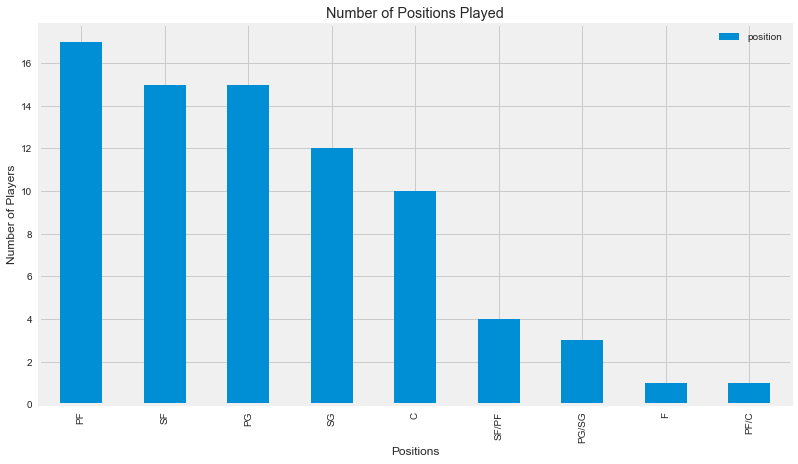

In [140]:
poscount=df['position'].value_counts().to_frame()

ax=poscount.plot(kind='bar',legend=True,figsize=(12,7))
ax.set_xlabel('Positions')
ax.set_ylabel('Number of Players')
ax.set_title('Number of Positions Played');
plt.show()

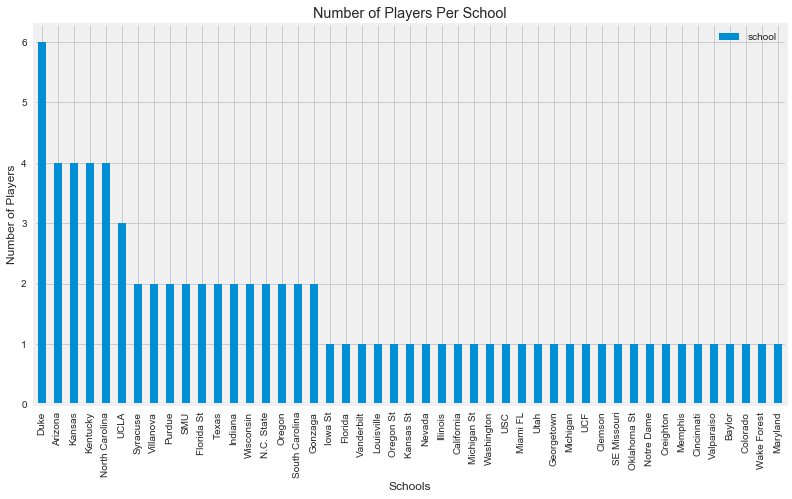

In [141]:
schoolcount=df['school'].value_counts().to_frame()

ax=schoolcount.plot(kind='bar',legend=True,figsize=(12,7))
ax.set_xlabel('Schools')
ax.set_ylabel('Number of Players')
ax.set_title('Number of Players Per School');
plt.show()

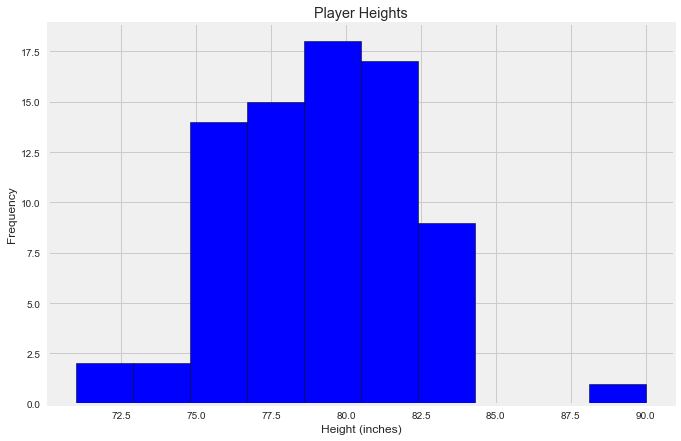

In [164]:
ax2=df['height'].hist(color='blue',edgecolor = "black", figsize=(10, 7))
ax2.set_xlabel('Height (inches)')
ax2.set_ylabel('Frequency')
ax2.set_title('Player Heights');

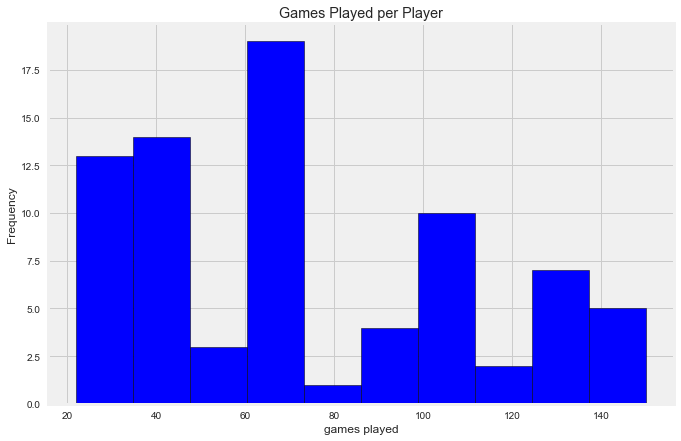

In [163]:
ax2=df['g'].hist(color='blue',edgecolor = "black", figsize=(10, 7))
ax2.set_xlabel('games played')
ax2.set_ylabel('Frequency')
ax2.set_title('Games Played per Player');

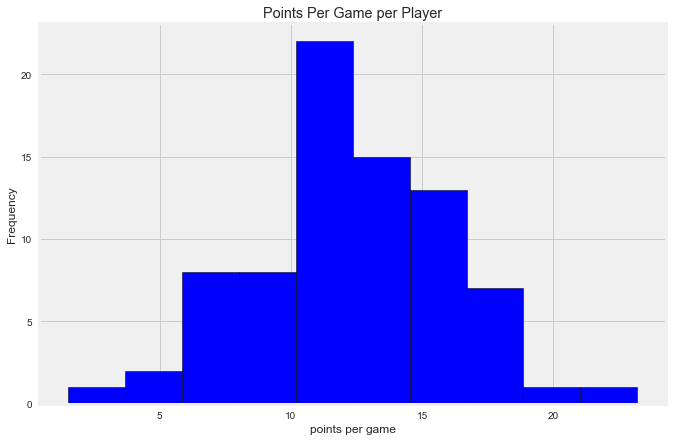

In [162]:
ax2=df['pts_per_g'].hist(color='blue',edgecolor = "black", figsize=(10, 7))
ax2.set_xlabel('points per game')
ax2.set_ylabel('Frequency')
ax2.set_title('Points Per Game per Player');

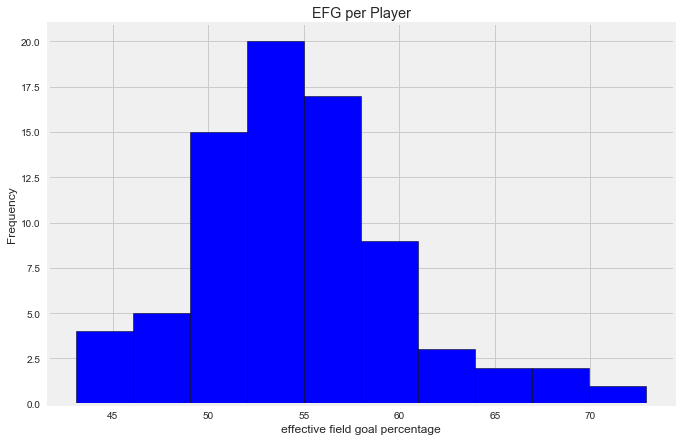

In [165]:
ax2=df['efg'].hist(color='blue',edgecolor = "black", figsize=(10, 7))
ax2.set_xlabel('effective field goal percentage')
ax2.set_ylabel('Frequency')
ax2.set_title('EFG per Player');

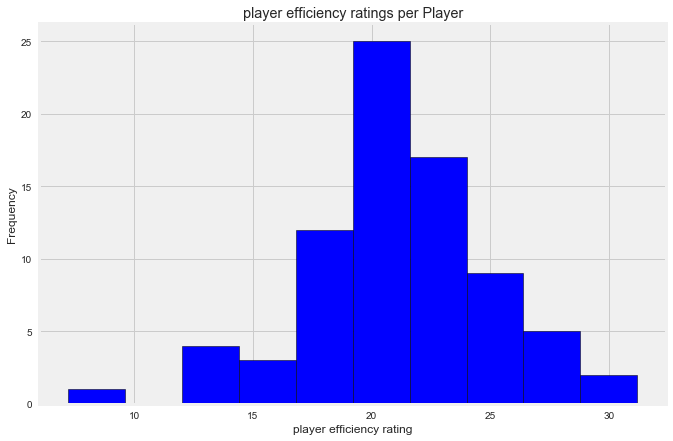

In [166]:
ax2=df['per'].hist(color='blue',edgecolor = "black", figsize=(10, 7))
ax2.set_xlabel('player efficiency rating')
ax2.set_ylabel('Frequency')
ax2.set_title('player efficiency ratings per Player');

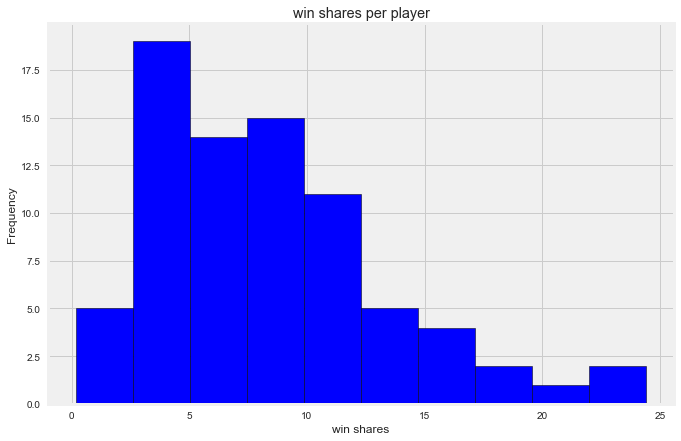

In [168]:
ax2=df['ws'].hist(color='blue',edgecolor = "black", figsize=(10, 7))
ax2.set_xlabel('win shares')
ax2.set_ylabel('Frequency')
ax2.set_title('win shares per player');

# Data Dictionary

<b>name:</b> Player name<br>
<b>position:</b> Player Position<br>
<b>school:</b> School that the player plays for<br>
<b>height:</b> Player Height in inches<br>
<b>weight:</b> Player weight in pounds<br>
<b>wingspan:</b> Player wingspan in inches<br>
<b>g:</b> number of games played<br>
<b>mp_per_g:</b> minutes played per game<br>
<b>fg_per_g:</b> shots made per game<br>
<b>fga_per_g:</b> shots attempted per game<br>
<b>fg_pct:</b> made shot percentage per game<br>
<b>fg2_per_g:</b> 2 pointers made per game<br>
<b>fg2a_per_g:</b> 2 pointers attempted per game<br>
<b>fg2_pct:</b> 2 pointer percentage per game<br>
<b>fg3_per_g:</b> 3 pointers made per game<br>
<b>fg3a_per_g:</b> 3 pointers attempted per game<br>
<b>fg3_pct:</b> percentage of 3 pointers made per game<br>
<b>ft_per_g:</b> free throws made per game<br>
<b>fta_per_g:</b> free throws attempted per game<br>
<b>ft_pct:</b> free throw percentage per game<br>
<b>trb_per_g:</b> total rebounds per game<br>
<b>ast_per_g:</b> number of assists per game<br>
<b>stl_per_g:</b> number of steals per game<br>
<b>blk_per_g:</b> number of blocks per game<br>
<b>tov_per_g:</b> number of turnovers per game<br>
<b>pf_per_g:</b> number of personal fouls per game<br>
<b>pts_per_g:</b> points per game<br>
<b>efg:</b> effective field goal percentage per game. this stat takes into account that a 3 pointer is worth more than a 2 pointer<br>
<b>per:</b> player efficiency rating. It is a rating calculated by summing up a players positive contributions and subtracting the negative ones.<br>
<b>ws:</b> win shares. an estimate of the number of wins contributed by a player due to his offense and defense